# Imports

In [34]:
import numpy as np
try:
    %matplotlib widget 
except:
    # !pip3.11 install ipympl
    %matplotlib widget
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from TLE_ import*
from TLE_file import*

In [35]:
try:
    from sgp4.api import Satrec
    from sgp4.api import jday
except ImportError:
    print("Error: sgp4.api not found. Installing sgp4...")
    !pip3.11 install sgp4    

In [36]:
try:
    import requests
except ImportError as e:
    print("requests is not installed",e)
    !pip3.12 install requests
    !cls

# Live Data Retrieve from ISS

In [37]:
URL = 'https://live.ariss.org/iss.txt'
live_ = False
if live_:
    data = requests.get(URL)

    with open('TLE_ISS_Live.txt','w') as f:
        for i in data.text.split('\n'):
            f.write(i)

## Data Writing

In [38]:
TLE_objs = TLE_obj_from_file('TLE_NOAA.txt')
# TLE_objs = TLE_obj_from_file('TLE_database.txt')


# for i in TLE_objs:
#     print(i)

In [39]:
sats = []
for i in TLE_objs:
    d = dict()
    d['obj'] = Satrec.twoline2rv(i.line1,i.line2)
    d['name'] = i.name
    d['time'] = i.time[1]
    sats.append(d)

In [40]:
# sat = Satrec.twoline2rv(TLE_objs[0].line1, TLE_objs[0].line2)

# jd, fr = jday(TLE_objs[0].time[1]['year'], TLE_objs[0].time[1]['month'], TLE_objs[0].time[1]['days'], TLE_objs[0].time[1]['hours'], TLE_objs[0].time[1]['minutes'], TLE_objs[0].time[1]['seconds'])
# e, r, v = sat.sgp4(jd, fr)

# print(e,r,v)

In [41]:
def plot_earth():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlim(-1.5e8,1.5e8)
    ax.set_ylim(-1.5e8,1.5e8)
    ax.set_zlim(-1.5e8,1.5e8)
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = 1.496e8 * np.outer(np.cos(u), np.sin(v))
    y = 1.496e8 * np.outer(np.sin(u), np.sin(v))
    z = 1.496e8 * np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x, y, z, color='b', alpha=0.3)
    return ax

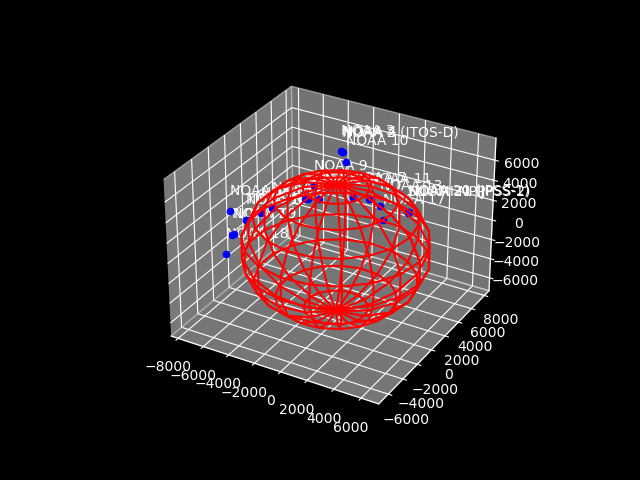

In [42]:
fig = plt.figure()
ax = plt.axes(projection='3d')
A_o = 6371

for i in sats:
    jd, fr = jday(i['time']['year'], i['time']['month'], i['time']['days'], i['time']['hours'], i['time']['minutes'], i['time']['seconds'])
    e, r, v = i['obj'].sgp4(jd, fr)
    ax.scatter3D(*r, label=i['name'], color='blue')
    ax.text(*r,s=i['name'],color='white')
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = A_o*np.cos(u)*np.sin(v)
y = A_o*np.sin(u)*np.sin(v)
z = A_o*np.cos(v)
ax.plot_wireframe(x, y, z, color="red")